<h2>Importing Libraries</h2>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import lxml.html as lh
%matplotlib inline

In [14]:
!pip install requests
!pip install lxml

**Defining the Path or Url**

In [15]:
url = 'https://www.worldometers.info/population/countries-in-africa-by-population/' #assign the web page

page = requests.get(pop) # create a handle to for contents of the bike page

doc = lh.fromstring(page.content) # store content of the population page under doc

tr_elements = doc.xpath('//tr') # parse data stored between tr in the html

[len(T) for T in tr_elements[:12]] # check the length of the first 12 rows

[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]

In [16]:
tr_elements = doc.xpath('//tr') # parse first row as header

col = [] # create empty list
i = 0
for t in tr_elements[0]: # for each row, store each first element (header) and an empty list
    i+=1
    name=t.text_content()
    print("%d:%s" % (i,name))
    col.append((name,[]))

1: #    
2: Country (ordependency)    
3: Population(2025)    
4: YearlyChange    
5: NetChange    
6: Density(P/Km²)    
7: Land Area(Km²)    
8: Migrants(net)    
9: Fert.Rate    
10: MedianAge    
11: UrbanPop %    
12: WorldShare    


<b> Check the data in other rows</b>

In [17]:
for j in range(1,len(tr_elements)): # Because header is the first row, data would be store in the subsequent rows.
    T = tr_elements[j] #T is j'th row

    if len(T)!=12: #if row is not size 3, //tr data is not from the table.
        break

    i = 0 #i is the index of the first column

    for t in T.iterchildren(): #iterate through each element of the row
        data=t.text_content()

        col[i][1].append(data) #append the data to the empty list of the i'th column

        i+=1 #increment i for the next column

In [18]:
[len(C) for (title,C) in col]

[58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58]

<b> Create a dataframe and read the file</b>

In [19]:
Dict = {title:column for (title,column) in col}
df = pd.DataFrame(Dict)

<h2>Reading the HTML Table into a Pandas DataFrame</h2>

**Reading the Data - Head**

In [20]:
df.head()

,#,Country (ordependency),Population(2025),YearlyChange,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,MedianAge,UrbanPop %,WorldShare
0,1,Nigeria,"237,527,782",2.08%,"4,848,304",261,"910,770","−15,258",4.3,18,55%,2.89%
1,2,Ethiopia,"135,472,051",2.58%,"3,412,284",135,"1,000,000","24,054",3.8,19,23%,1.65%
2,3,Egypt,"118,365,995",1.57%,"1,827,737",119,"995,450","−57,305",2.7,24,41%,1.44%
3,4,DR Congo,"112,832,473",3.25%,"3,556,208",50,"2,267,050","−27,309",5.9,16,45%,1.37%
4,5,Tanzania,"70,545,865",2.9%,"1,985,708",80,"885,800","−12,730",4.5,17,40%,0.86%


In [22]:
df.tail()

,#,Country (ordependency),Population(2025),YearlyChange,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,MedianAge,UrbanPop %,WorldShare
53,54,Cabo Verde,"527,326",0.47%,"2,449",131,"4,030","−1,284",1.5,29,79%,0.0064%
54,55,Mayotte,"337,011",3.22%,"10,506",899,375,44,4.5,17,41%,0.0041%
55,56,Sao Tome & Principe,"240,254",2%,"4,718",250,960,−650,3.5,19,78%,0.0029%
56,57,Seychelles,"132,779",1.81%,"2,361",289,460,"1,590",2.1,34,44%,0.0016%
57,58,Saint Helena,"5,197",−0.76%,−40,13,390,1,1.6,51,33%,0.000063%


**knowing the full data count**

In [24]:
df.shape

(58, 12)

**Getting Descriptive statistics**

In [25]:
df.describe()

,#,Country (ordependency),Population(2025),YearlyChange,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,MedianAge,UrbanPop %,WorldShare
count,58,58,58,58,58,58,58,58,58,58,58,58
unique,58,58,58,53,58,51,58,58,28,18,42,49
top,1,Nigeria,"237,527,782",2.43%,"4,848,304",20,"910,770","−15,258",3.8,19,44%,0.18%
freq,1,1,1,4,1,2,1,1,5,11,4,3


**Preparing The Data-Getting the Correlation**

In [29]:
df.columns

Index([' #    ', ' Country (ordependency)    ', ' Population(2025)    ',
       ' YearlyChange    ', ' NetChange    ', ' Density(P/Km²)    ',
       ' Land Area(Km²)    ', ' Migrants(net)    ', ' Fert.Rate    ',
       ' MedianAge    ', ' UrbanPop %    ', ' WorldShare    '],
      dtype='object')

In [32]:
df2 = df[['Population  (2024)', 'Yearly  Change','Net  Change', 'Density  (P/Km²)', 'Land Area  (Km²)',    'Migrants  (net)', 'Fert.  Rate', 'Med.  Age', 'Urban  Pop %','World  Share']]


KeyError: "None of [Index(['Population  (2024)', 'Yearly  Change', 'Net  Change',\n       'Density  (P/Km²)', 'Land Area  (Km²)', 'Migrants  (net)',\n       'Fert.  Rate', 'Med.  Age', 'Urban  Pop %', 'World  Share'],\n      dtype='object')] are in the [columns]"

**Finding the correlation after droping non numerics**

In [ ]:
df2.corr(numeric_only=True)

,Population (2024),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age
Population (2024),1.000000,0.956441,-0.045547,0.479951,-0.034859,0.192832,-0.181702
Net Change,0.956441,1.000000,-0.058994,0.490796,0.038571,0.341173,-0.271655
Density (P/Km²),-0.045547,-0.058994,1.000000,-0.408421,0.005495,-0.101266,0.079323
Land Area (Km²),0.479951,0.490796,-0.408421,1.000000,-0.138140,0.319144,-0.191330
Migrants (net),-0.034859,0.038571,0.005495,-0.138140,1.000000,-0.070268,0.103557
Fert. Rate,0.192832,0.341173,-0.101266,0.319144,-0.070268,1.000000,-0.819347
Med. Age,-0.181702,-0.271655,0.079323,-0.191330,0.103557,-0.819347,1.000000


**Data Plots**

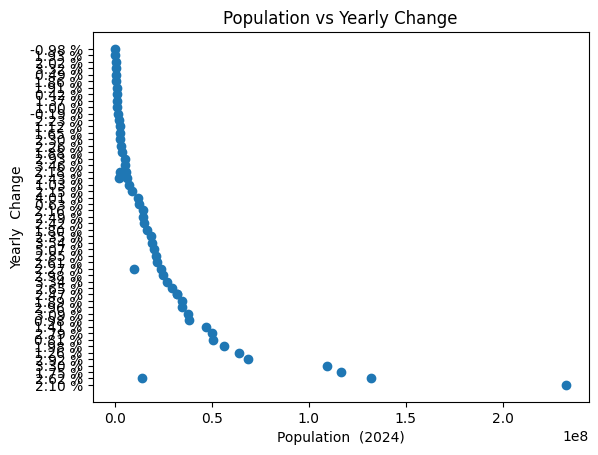

In [ ]:
plt.scatter(df2['Population  (2024)'], df2['Yearly  Change'])
plt.title('Population vs Yearly Change')
plt.xlabel('Population  (2024)')
plt.ylabel('Yearly  Change')
plt.show()

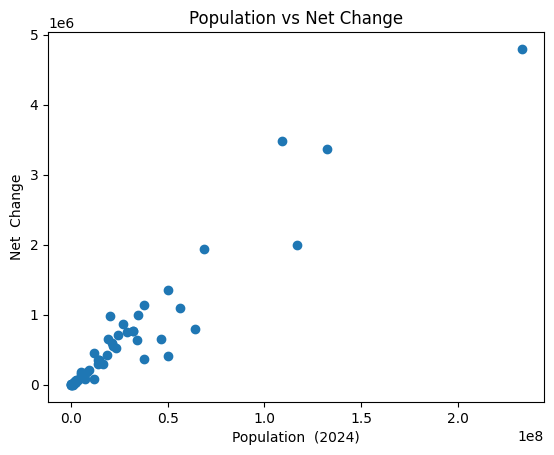

In [ ]:
plt.scatter(df2['Population  (2024)'], df2['Net  Change'])
plt.title('Population vs Net Change')
plt.xlabel('Population  (2024)')
plt.ylabel('Net  Change')
plt.show()

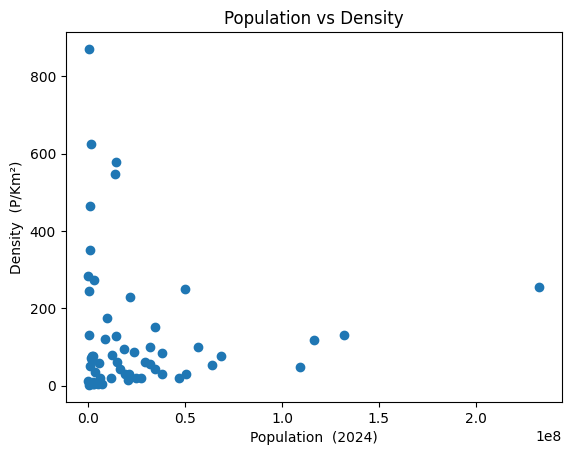

In [ ]:
plt.scatter(df2['Population  (2024)'], df2['Density  (P/Km²)'])
plt.title('Population vs Density')
plt.xlabel('Population  (2024)')
plt.ylabel('Density  (P/Km²)')
plt.show()

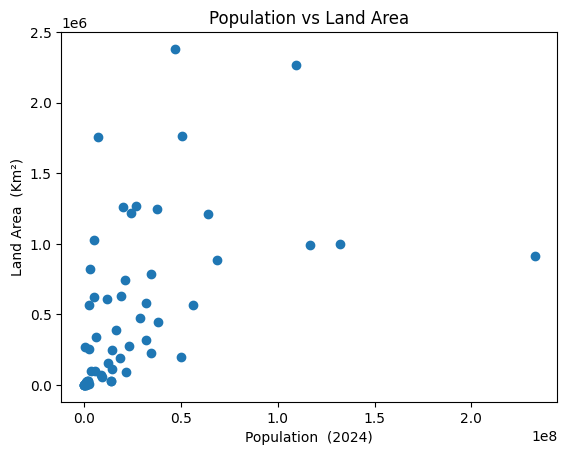

In [ ]:
plt.scatter(df2['Population  (2024)'], df2['Land Area  (Km²)'])
plt.title('Population vs Land Area')
plt.xlabel('Population  (2024)')
plt.ylabel('Land Area  (Km²)')
plt.show()

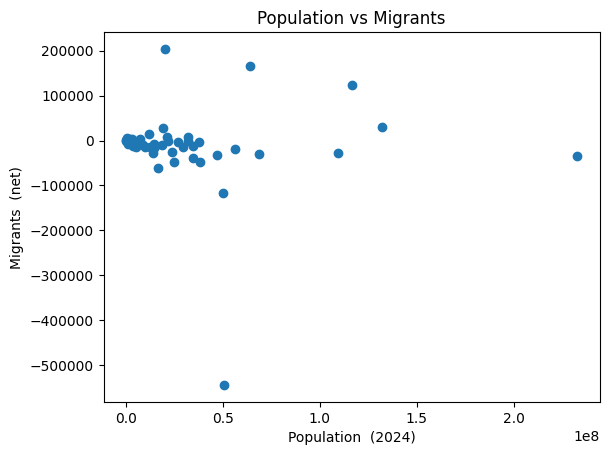

In [ ]:
plt.scatter(df2['Population  (2024)'], df2['Migrants  (net)'])
plt.title('Population vs Migrants')
plt.xlabel('Population  (2024)')
plt.ylabel('Migrants  (net)')
plt.show()

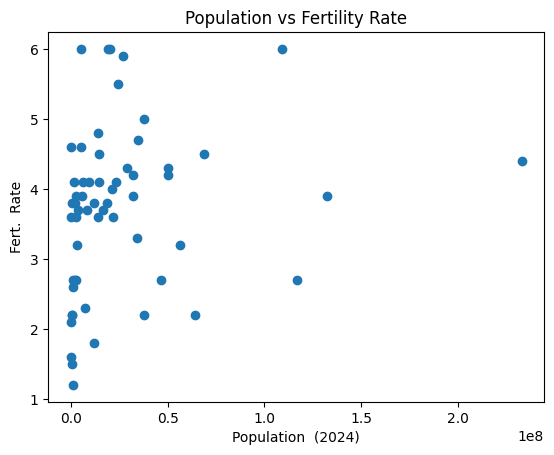

In [ ]:
plt.scatter (df2['Population  (2024)'], df2['Fert.  Rate'])
plt.title('Population vs Fertility Rate')
plt.xlabel('Population  (2024)')
plt.ylabel('Fert.  Rate')
plt.show()

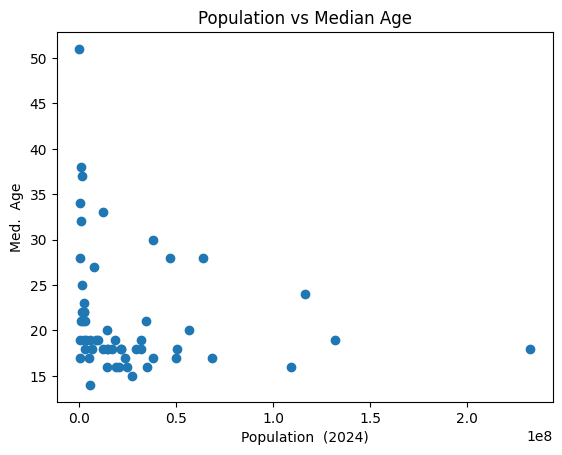

In [ ]:
plt.scatter(df2['Population  (2024)'], df2['Med.  Age'])
plt.title('Population vs Median Age')
plt.xlabel('Population  (2024)')
plt.ylabel('Med.  Age')
plt.show()

**simple Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
ln = LinearRegression()
ln

LinearRegression()

In [ ]:
x = df2[['Net  Change']]
y = df2['Population  (2024)']

In [ ]:
ln.fit(x,y)

LinearRegression()

**The prediction**

In [ ]:
Yhat=ln.predict(x)
Yhat[0:5]

array([2.01796422e+08, 1.42104355e+08, 8.50394437e+07, 1.47054492e+08,
       8.25348941e+07])

**The intercept**

In [ ]:
ln.intercept_

np.float64(1360030.368363019)

**The coefficient**

In [ ]:
ln.coef_

array([41.7877645])

**Estimated Simple Linear Model**

Population (2024) = 1,360,030 + 41.78*(Net Change)

**Multiple Linear Regression**

In [ ]:
Z = df2[['Net  Change','Density  (P/Km²)','Land Area  (Km²)','Migrants  (net)','Fert.  Rate','Med.  Age']]

In [ ]:
ln.fit       (Z, df2['Population  (2024)'])

LinearRegression()

**Finding the Intercept**

In [ ]:
ln.intercept_

np.float64(40609458.08978886)

**The Coefficeint**

In [ ]:
ln.coef_

array([ 4.34193188e+01,  3.63431292e+03,  3.26846487e+00, -3.48448421e+01,
       -8.28039779e+06, -5.60434461e+05])

**The multiple Linear Regression model**

Population (2024) = 40,609,458 + 4.34*(Net Change) + 3.63*(Density/km^2) + 3.26*(Land area(kam^2) - 3.48*(Migrants(net) - 8.28*(Fertility Rate) - 5.60*(Med.Age)

In [ ]:
Y_hat = ln.predict(Z)
Y_hat[0:5]

array([2.07480261e+08, 1.46607619e+08, 9.11106247e+07, 1.41866967e+08,
       8.23802129e+07])

**Drawing Graphs**

<ipython-input-106-1f0d83480686>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df2['Population  (2024)'], hist=False, color="r", label="Actual Value")
<ipython-input-106-1f0d83480686>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label=

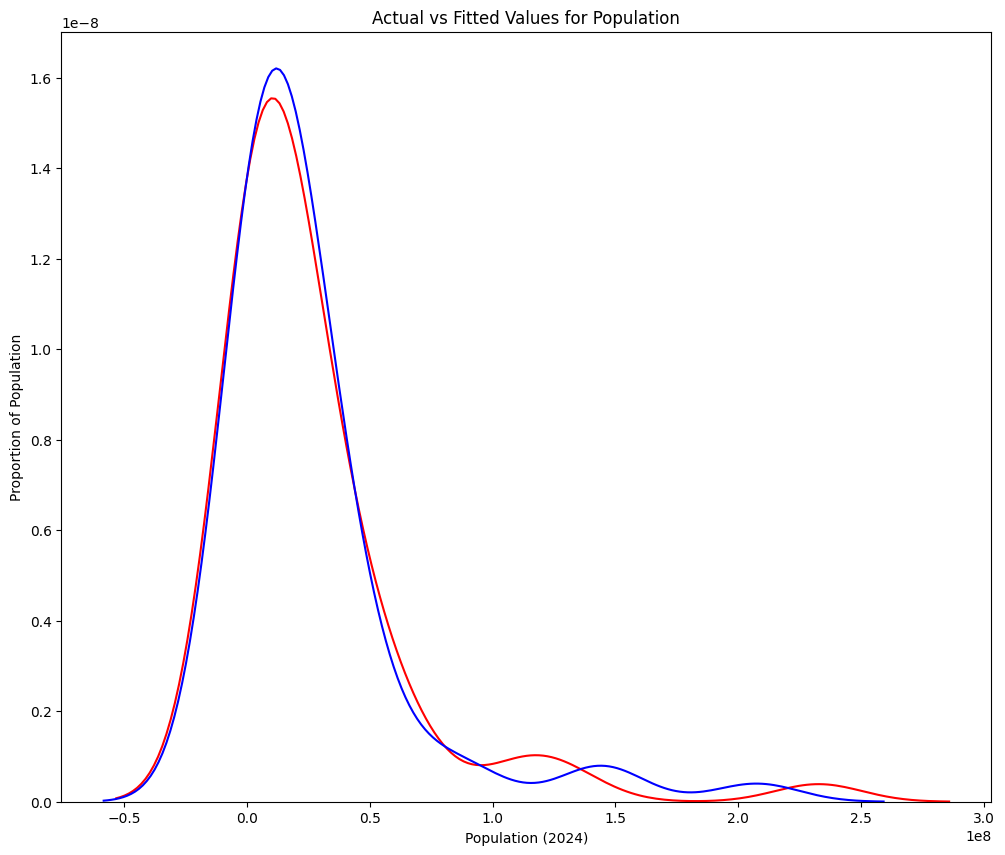

In [ ]:
import seaborn as sns
width = 12
height = 10
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df2['Population  (2024)'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Population')
plt.xlabel('Population (2024)')
plt.ylabel('Proportion of Population')

plt.show()
plt.close()


**The Polynomial Regression**

In [ ]:
def plotpolly(model, independent_variable, dependent_variabble, Name):
  x_new = np.linspace(15, 55, 100)
  y_new = model(x_new)

  plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
  plt.title('Polynomial Fit with Matplotlib')
  ax=plt.gca()
  ax.set_facecolor((0.898, 0.898, 0.898))
  fig = plt.gcf()
  plt.xlabel(Name)
  plt.ylabel('Population (2024)')

  plt.show()
  plt.close()

**Polynomial Plot**

(0.0, 1134537709.700778)

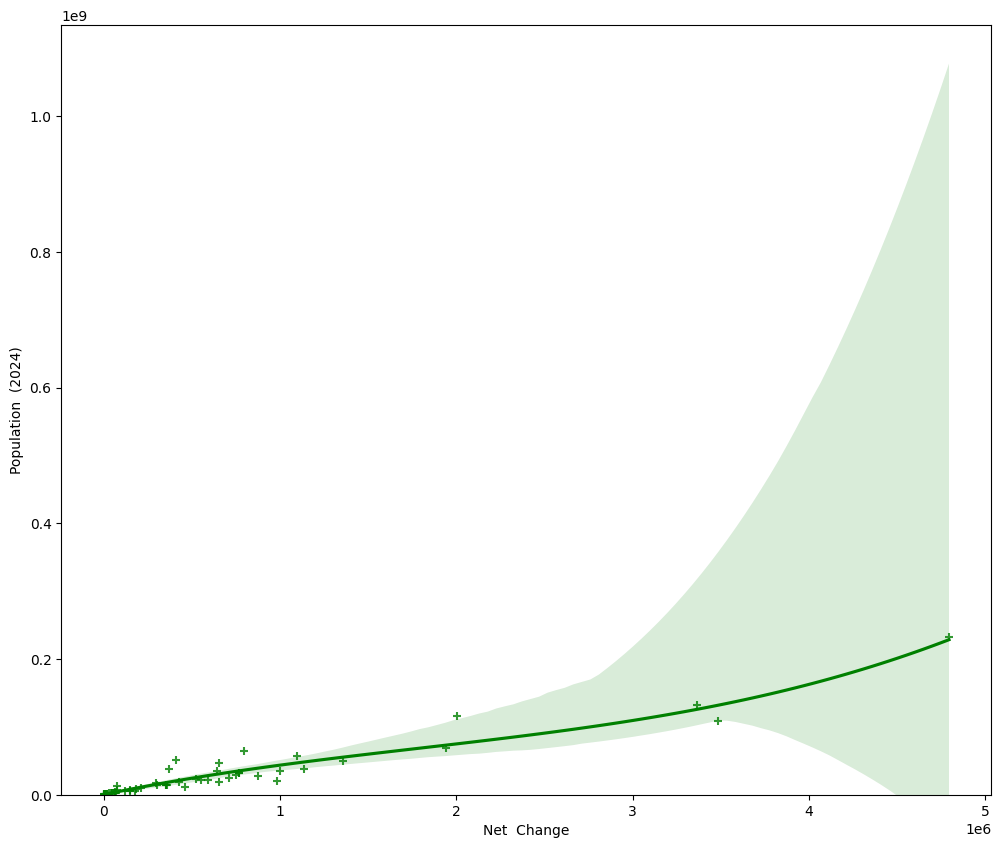

In [ ]:
import seaborn as sns
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Net  Change", y="Population  (2024)", data=df2, order=3, color="green", marker='+')
plt.ylim(0,)


In [ ]:
f= np.polyfit(df['Net  Change'], df['Population  (2024)'], 3)
p =np.poly1d(f)
print(p)

           3             2
2.566e-12 x - 1.377e-05 x + 54.58 x + 2.32e+05


**Plotting the Function**

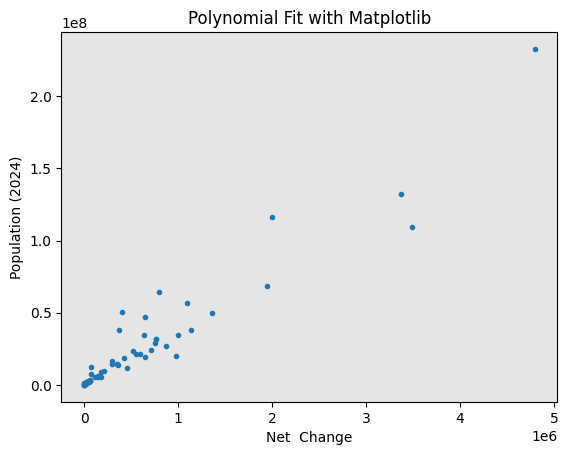

In [ ]:
plotpolly (p, x, y, 'Net  Change')

**Using Order 11**

           11             10             9             8             7
-1.54e-59 x  + 2.669e-52 x  - 1.897e-45 x + 7.192e-39 x - 1.589e-32 x
              6             5             4             3            2
 + 2.105e-26 x - 1.667e-20 x + 7.716e-15 x - 2.061e-09 x + 0.000313 x + 29.22 x + 6.907e+05


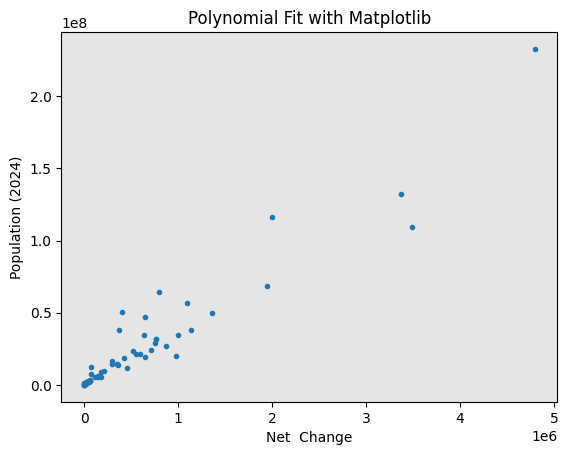

In [ ]:
# Order 11
f1 = np.polyfit(df2['Net  Change'], df2['Population  (2024)'], 11)
p1 = np.poly1d(f1)
print(p1)
plotpolly(p1,x,y, 'Net  Change')

**The In-Sample Evaluation**

**R^2**

**MSE**

In [ ]:
from sklearn.metrics import mean_squared_error

**For Simple Linear Regression**

In [ ]:
#Net_change_fit
ln.fit(x, y)
# Find the R^2
print('The R-square is: ', ln.score(x, y))

The R-square is:  0.9147787601559092


**Therefor the simple Linear Regression explains 91.47% of the Population (2024)**

In [ ]:
Yhat=ln.predict(x)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [2.01796422e+08 1.42104355e+08 8.50394437e+07 1.47054492e+08]


**Importing The Function Mean Squared Error**

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse=mean_squared_error(df2['Population  (2024)'], Yhat)
print('The mean square error of Population (2024) and predicted value is: ', mse)

The mean square error of Population (2024) and predicted value is:  133168869330577.78


**For Multiple Linear Regression**

R^2

In [ ]:
#fit the model
ln.fit(Z, df2['Population  (2024)'])
# Find the R^2
print('The R-square is: ', ln.score(Z, df2['Population  (2024)']))


The R-square is:  0.9457828933702711


**Here 94.57% of Population (2024) is explained by the Multi fit**

**MSE**

In [ ]:
mse=mean_squared_error(df2['Population  (2024)'], Y_hat)
print('The mean square error of Population (2024) and predicted value is: ', mse)

The mean square error of Population (2024) and predicted value is:  84721024963555.45


**For Polynomial Regression**

**R^2**

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_squared = r2_score(y, p(x))
print('The R-square value is: ', r2_squared)

The R-square value is:  0.9312312201887817


**We can say here that 93.12% of the Population (2024) is explained by the polyfit**

**Mean Squared Error**

In [ ]:
mean_squared_error(df2['Population  (2024)'], p(x))

107459838292160.31

**Conclusion**

**The Multiple Linear Regression Model here is the best for prediction of Population (2024) since it has the highest R^2 values (94.57%) and lower MSE compared to the linear fit and polynomial fit**